<div class="alert alert-info">
    <h1><strong>BitCamp Hackathon:</strong> Quantum Track </h1>
    <h2><strong> Challenge 4 -</strong> VQE for Chemistry</h2>
</div>

In [3]:
# Imports!
from qiskit import Aer, IBMQ
from qiskit_nature.drivers import PySCFDriver, UnitsType, Molecule
from qiskit_nature.problems.second_quantization import ElectronicStructureProblem
from qiskit_nature.converters.second_quantization import QubitConverter
from qiskit_nature.mappers.second_quantization import JordanWignerMapper
from qiskit_nature.algorithms import GroundStateEigensolver
from qiskit_nature.algorithms import VQEUCCFactory
from qiskit.algorithms import NumPyMinimumEigensolver
from qiskit_optimization.applications import Knapsack
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_optimization.converters import QuadraticProgramToQubo
from qiskit.algorithms import VQE
from qiskit.circuit.library import TwoLocal
from qiskit.utils import QuantumInstance
import numpy as np
import matplotlib.pyplot as plt
from qiskit.circuit.library import EfficientSU2, QAOAAnsatz
from qiskit.algorithms.optimizers import SPSA, COBYLA
from qiskit.providers.aer.noise import NoiseModel
provider = IBMQ.load_account()
print("Libraries imported successfully")
%matplotlib widget

Libraries imported successfully


# Review of Tunable Circuits

Last week, we learned how to make tunable circuits in Qiskit! Do you remember the code for making these circuits?

In [2]:
# Block 1 - Create a tunable circuit using the EfficientSU2 library, with 3 qubits, full entanglement, 4 repetitions, and barriers between gates

# Section 1 - Solving the Knapsack problem

In this part, we will use the tunable circuits we created last week to solve the knapsack problem using VQE!

The knapsack problem is a problem in combinatorial optimization: Given a set of items, each with a weight and a value, determine the number of each item to include in a collection so that the total weight is less than or equal to a given limit and the total value is as large as possible. It derives its name from the problem faced by someone who is constrained by a fixed-size knapsack and must fill it with the most valuable items. The problem often arises in resource allocation where the decision makers have to choose from a set of non-divisible projects or tasks under a fixed budget or time constraint, respectively.

## Part 1 - Setting up the problem

In this part, we will define the knapsack problem. Qiskit has a built-in function called `Knapsack` that we will use to define the problem. 

We define a list of values, a list of weights, the maximum weight, and then put it all together into a variable called `problem` using the Knapsack function.

In [8]:
# BLOCK 2 - Defining the knapsack problem. We define a list of values, a list of weights, the maximum weight, and then
# put it all together into a variable called `problem' using the Knapsack function.
values = [4, 2, 5, 10]   # list of the values of items
weights = [3, 1, 2, 6]   # list of the weights of items
max_weight = 10            # maximum weight capacity (knapsack capacity)

knapsack_problem = Knapsack(values = values, weights = weights, max_weight = max_weight) #putting it all together

Feel free to be creative here - enter your own combination of values, weights, and max_weight! For a first pass, we recommend keeping the number of individual values < 5 . You can try bigger problems later!

## Part 2 - Using VQE to solve the problem

Let's solve the problem using VQE! Don't worry about how VQE works and the details of what is going on in this code - just try running it and see what results it produces.

In Block 7 below, we will convert the knapsack problem to a form that a quantum computer can understand, and also find out the number of qubits required to solve the problem.

How many qubits does your problem need?

In [9]:
# BLOCK 3- Converting the knapsack problem to a quantum circuit, i.e., a colletion of quantum gates (or operators).
# Run this block to convert the knapsack problem to a quantum operator, and print the number of qubits used.
operator, offset = QuadraticProgramToQubo().convert(knapsack_problem.to_quadratic_program()).to_ising()
print("number of qubits =",operator.num_qubits)

number of qubits = 8


Next, we will set up VQE. We will specify the tunable circuit using `EfficientSU2`. YOU WILL NEED TO FILL CODE HERE!!!

We will also specify the classical optimizer we want to use. Remember that hybrid algorithms have a tunable quantum circuit, and a classical computer that tells it which parameters to use. This optimizer is the classical part of the hybrid algorithm.  We will use a popular classical optimization algorithm known as SPSA. You do not need to fill code here - we have filled it out for you.

We will use a built-in Qiskit function named `VQE` to put together all this information to solve the problem using the VQE algorithm. Again, we have completed this step for you.

In [10]:
# BLOCK 4 - Setting up VQE.
# We define our tunable circuit for VQE. Here, we will choose EfficientSU2. YOU WILL NEED TO FILL CODE FOR THIS STEP
# We define which classical optimizer we want to use - here we will use one called SPSA
# We tell our code to use VQE with the tunable circuit, the optimizer, and the quantum instance

# FILL CODE HERE TO DEFINE THE TUNABLE QUANTUM CIRCUIT. SPECIFY THE CORRECT NUMBER OF QUBITS, AND CHOOSE THE NUMBER OF REPS AND THE LEVEL OF ENTANGLEMENT.
tunable_circuit = EfficientSU2(num_qubits = operator.num_qubits, reps = 3, entanglement = 'full',insert_barriers=True ) 

optimizer = SPSA(maxiter=15) # Classical optimizer

method = VQE(ansatz = tunable_circuit, optimizer = optimizer, quantum_instance = Aer.get_backend('qasm_simulator')) # Using the VQE algorithm 

Let's visualize the circuit you made!

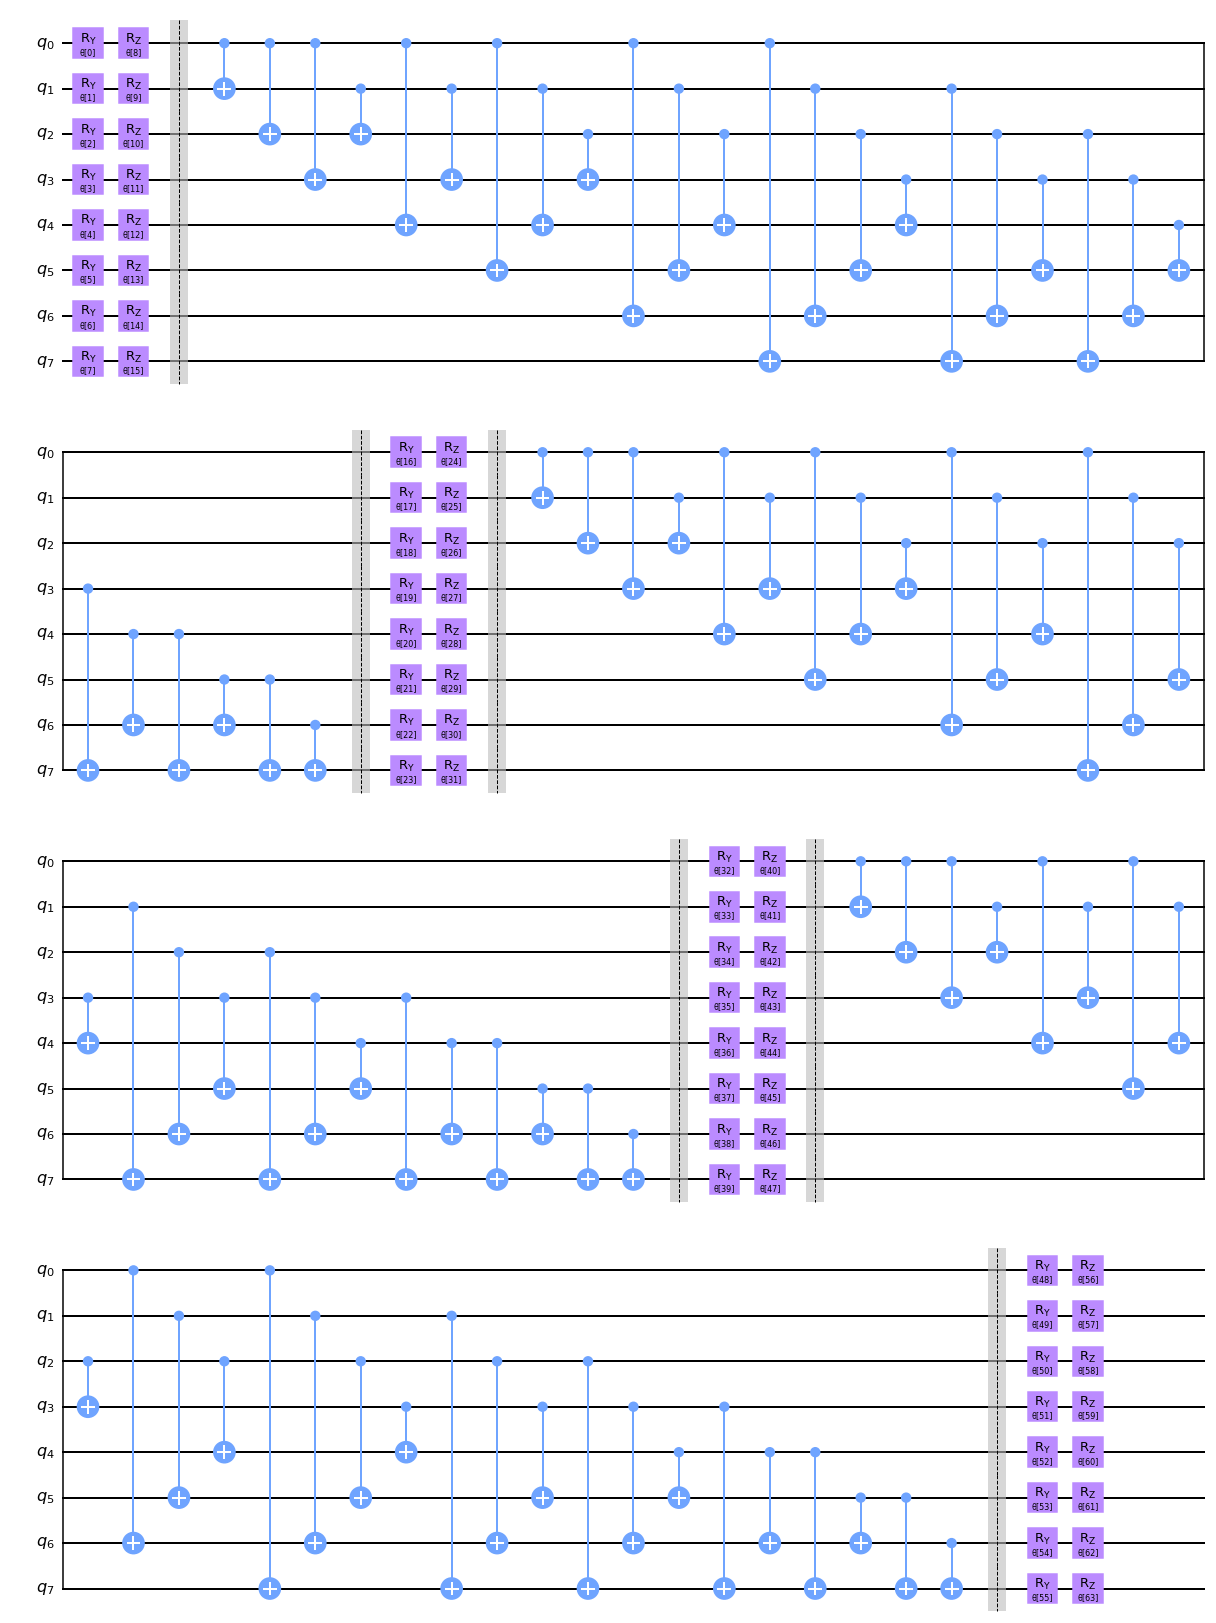

In [11]:
# Block 5 - Visualize your circuit by drawing it
tunable_circuit.decompose().draw()

Finally, let' solve the problem using VQE! We have written code in the block below to solve the problem. Don't worry about the code - focus on the results you get. 

The results will be displayed as follows:

`result:`

`optimal function value: 17.0`

`optimal value: [0. 1. 1. 1.]`

`status: SUCCESS`

`solution:`

 `[1, 2, 3]`
 
Here, `optimal function value: 17.0` is the optimized value of your knapsack found by VQE. `optimal value: [0. 1. 1. 1.]` shows which items you should put in your knapsack to get this value - 0 means that you should omit this item, and 1 means you should keep it. In this example, you should keep the items with index 1, 2, and 3, and omit the item with index 0 (remember indices begin at 0). This successful solution is also displayed separately as `solution: [1, 2, 3]` . 

Can you verify that VQE solves the knapsack problem correctly?

In [12]:
# BLOCK 6 - Running VQE and printing results. 
calc = MinimumEigenOptimizer(method)
result = calc.solve(knapsack_problem.to_quadratic_program())
print('result:\n', result)
print('\nsolution:\n', knapsack_problem.interpret(result))

result:
 optimal function value: 17.0
optimal value: [0. 1. 1. 1.]
status: SUCCESS

solution:
 [1, 2, 3]


## Part 3 - Activities

1. Can you simplify the tunable circuit and still get the right result? Try reducing the number of repetitions and the level of entanglement in the tunable circuit. Do you still get the right answer?
2. Try changing the parameters (values, weights, max_weight). Does VQE still give you the optimal knapsack?

# Section 2 - Finding the structure of a molecule

## Defining the system

The first step is to define the molecular system. In the following we ask for the electronic part of a hydrogen molecule.

Qiskit is interfaced with different classical codes which are able to find the molecular structure. Interfacing between Qiskit and the following codes is already available: Gaussian, Psi4, PyQuante, PySCF.

In the following we set up a PySCF driver, for the hydrogen molecule with the two atoms at a distance of 0.8 angstrom from each other.

In [2]:
#Block 7 - Specifying the parameters of the molecule
molecule = Molecule(geometry=[['H', [0., 0., 0.]],
                              ['H', [0., 0., 0.8]]],
                     charge=0, multiplicity=1)    # You can vary the distance between the atoms by changing 0.8
structure_problem = PySCFDriver(molecule = molecule, unit=UnitsType.ANGSTROM)
qubit_converter = QubitConverter(JordanWignerMapper())

/tmp/ipykernel_61/1377952087.py:5: DeprecationWarning: The PySCFDriver class is deprecated as of version 0.2.0 and will be removed no sooner than 3 months after the release. Instead use the PySCFDriver class from qiskit_nature.drivers.second_quantization.pyscfd.
  structure_problem = PySCFDriver(molecule = molecule, unit=UnitsType.ANGSTROM)


## NumPyMinimumEigensolver

A solver is the algorithm through which the ground state is computed.

Let’s first start with a purely classical example: the NumPy minimum eigensolver. This algorithm exactly solves the structure for the molecule. The hydrogen molecule is small enough that we can solve it exactly using a classical solver. Although the classical solver scales badly, i.e., it takes a very long time to solve larger molecules, it can be used on small systems to check the results of the quantum algorithms.

Run the block below to solve the problem using the classical solver.

In [3]:
#Block 8 - Solving using classical solver
method = NumPyMinimumEigensolver()

calc = GroundStateEigensolver(qubit_converter, method)
result = calc.solve(ElectronicStructureProblem(structure_problem))
print("Total energy = ", result.total_energies)

Total energy =  [-1.13414767]


The most important number here is the total energy. Keep it in mind! We will compare the result we get with the VQE solver with this result.

## VQE Solver

Now, we are going to find the energy of this molecule using VQE. To simulate the performance on a real device, let's create a noise model based on ibmq_belem just as we had done in the benchmarking lab.

In [4]:
# Block 9 - Defining a noise model 
backend_belem = provider.get_backend('ibmq_belem')   # Specifying which backend to use
noise_model_belem = NoiseModel.from_backend(backend_belem)  # Creating a noise model from this backend.

Next, we are going to set up VQE. THis is very similar to the setup we had done for the knapsack problem. Below, we have defined a tunable circuit and a classical optimizer and put those together using Qiskit's VQE function.

Don't worry about `QuantumInstance` - it is a way in Qiskit to specify the backend and the noise model together for the VQE simulation.

In [5]:
#Block 10 - Setting up VQE

qinstance = QuantumInstance(backend=Aer.get_backend('statevector_simulator'), noise_model = noise_model_belem)

tunable_circuit = EfficientSU2(reps= 1, entanglement='full') # This is the tunable circuit - this is the quantum part of VQE
optimizer = COBYLA(maxiter=500) # Classical optimizer - this is the classical part of VQE
method = VQE(ansatz = tunable_circuit, optimizer = optimizer, quantum_instance = qinstance)# Putting everything together using Qiskit's VQE function

Finally, it's time to find the energy of this structure and print the results!

In [6]:
#Block 11 - Solving using VQE
calc = GroundStateEigensolver(qubit_converter, method)
result = calc.solve(ElectronicStructureProblem(structure_problem))


In [7]:
# Block 12 - Printing results
print("Total energy = ", result.total_energies)
print("Error = ", (-1.13728568 - result.total_energies)/(-1.13728568)*100) 

Total energy =  [-0.68334768]
Error =  [39.91415779]


How does the total energy here compare with the exact solution?

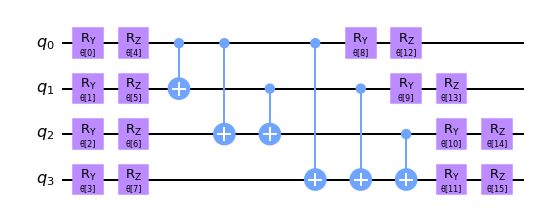

In [24]:
# Block 13 - Drawing the tunable circuit
tunable_circuit.decompose().draw()

# Activities:
1. Can you tweak your tunable circuit so that your total energy is closer to the exact solution? 
2. What is the least number of repetitions that still gives you a good match with the exact solution?
3. What happens when there are more repetitions? Do you notice errors?
4. Change the distance between the atoms in Block 13. Can you find the distance that minimizes the total energy?

# Extra content

In the lab, we showed you how we can find the energy for one distance between the hydrogen atoms. Now, let's find the energies for many distances, and in the process, find the lowest possible energy. The distance at which we get the lowest energy corresponds to the ground state bond length of the hydrogen molecule!

In [31]:
#Block 14 - Creating energy diagram using classical solver
method = NumPyMinimumEigensolver()

calc = GroundStateEigensolver(qubit_converter, method)
classical_energies = []
distances = [0.1,0.3,0.5,0.7,0.9,1.1,1.3,1.5,1.7,1.9,2.1,2.3,2.5]

for i in range(len(distances)):
    # Create a variable to select the value from distances at the current index i
    molecule = Molecule(geometry=[['H', [0., 0., 0.]],
                                ['H', [0., 0., distances[i]]]], # insert the variable from the previous line here
                      charge=0, multiplicity=1)
    structure_problem = PySCFDriver(molecule = molecule, unit=UnitsType.ANGSTROM)
    result = calc.solve(ElectronicStructureProblem(structure_problem))
    classical_energies.append(result.total_energies)
    print("Completed", i+1, "out of", str(len(distances)), "calculations")

Completed 1 out of 13 calculations
Completed 2 out of 13 calculations
Completed 3 out of 13 calculations
Completed 4 out of 13 calculations
Completed 5 out of 13 calculations
Completed 6 out of 13 calculations
Completed 7 out of 13 calculations
Completed 8 out of 13 calculations
Completed 9 out of 13 calculations
Completed 10 out of 13 calculations
Completed 11 out of 13 calculations
Completed 12 out of 13 calculations
Completed 13 out of 13 calculations


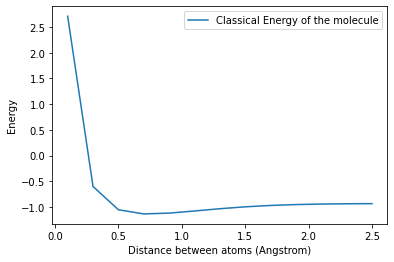

In [32]:
#Block 15 - Plotting classical energy diagram

plt.plot(distances, classical_energies, label="Classical Energy of the molecule")
plt.xlabel('Distance between atoms (Angstrom)')
plt.ylabel('Energy')
plt.legend()
plt.show()

In [33]:
#Block 16 - Obtaining VQE energy diagram
qinstance = QuantumInstance(backend = Aer.get_backend('statevector_simulator'), noise_model = noise_model_belem)
tunable_circuit = EfficientSU2(reps= 1, entanglement='full') # Tunable quantum circuit
optimizer = COBYLA(maxiter=100) # Classical optimizer - this is the classical part of VQE
method = VQE(ansatz = tunable_circuit, optimizer = optimizer, quantum_instance = qinstance)# Putting everything together using Qiskit's VQE function
calc = GroundStateEigensolver(qubit_converter, method)

vqe_energies = []
distances = [0.1,0.3,0.5,0.7,0.9,1.1,1.3,1.5,1.7,1.9,2.1,2.3,2.5]
for i in range(len(distances)):
    dist = distances[i]
    molecule = Molecule(geometry=[['H', [0., 0., 0.]],
                                ['H', [0., 0., dist]]],
                      charge=0, multiplicity=1)
    structure_problem = PySCFDriver(molecule = molecule, unit=UnitsType.ANGSTROM, basis='sto3g')
    result = calc.solve(ElectronicStructureProblem(structure_problem))
    vqe_energies.append(result.total_energies)
    print("Completed", i+1, "out of", str(len(distances)), "calculations")

Completed 1 out of 13 calculations
Completed 2 out of 13 calculations
Completed 3 out of 13 calculations
Completed 4 out of 13 calculations
Completed 5 out of 13 calculations
Completed 6 out of 13 calculations
Completed 7 out of 13 calculations
Completed 8 out of 13 calculations
Completed 9 out of 13 calculations
Completed 10 out of 13 calculations
Completed 11 out of 13 calculations
Completed 12 out of 13 calculations
Completed 13 out of 13 calculations


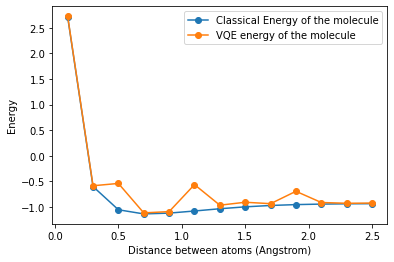

In [34]:
#Block 17 - Plotting VQE energy diagram
plt.plot(distances, classical_energies, distances, vqe_energies,marker = "o")
plt.xlabel('Distance between atoms (Angstrom)')
plt.ylabel('Energy')
plt.legend(['Classical Energy of the molecule','VQE energy of the molecule'])
plt.show()

### © 2022 The Coding School

**All rights reserved**

*Use of this activity is for personal use only. Copying, reproducing, distributing, posting or sharing this activity in any manner with any third party are prohibited under the terms of this registration. All rights not specifically licensed under the registration are reserved.*